# Exercise 3

In this exercise, we want to talk about sampling.

First, import numpy and matplotlib.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Fourier Transform

First we want to read a .wav-file. To do so, we need to import a scipy module (and some other stuff). We can ignore the WavFileWarning. 

In [2]:
from scipy.io import wavfile
import IPython.display
import scipy.signal

Read the wavefile 'sample.wav' by using $scipy.io.wavfile.read()$. If present, ignore the warning. Be careful, the function gives you two outputs.

In [3]:
samplingRate, data = scipy.io.wavfile.read('sample.wav')

C:\Users\Schirrmacher\Anaconda3\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


Listen to the file ($IPython.display.Audio()$).

In [4]:
audio1 = IPython.display.Audio(data, rate=samplingRate)
audio1

It seems pretty noisy. We want to cancel out the noise.

In a first step, print the number of samples and calculate the length of the .wav-file in seconds.
If you don't know the type of the file, you may want to check it by using $type()$.

In [5]:
numSamples = np.shape(data)[0]
length = np.shape(data)[0] / samplingRate

Determine the frequencies contained in this signal. Therefore, apply the Fourier transform to the audio file.

In [6]:
f = np.fft.fft(data)
type(f)


numpy.ndarray

For the visualization of such FT signals, the mathplot library provides a stem plot function plotting vertical lines at the $x$ locations from the baseline to $y$. Normally the ends are marked with a dot, but for better vizualization of our signal we don't want to have them - so set $markerfmt$ to ' '. Due to the sampling theorem, the highest frequency that can be detectet by the FFT is smaller than $\frac{samplingRate}{2}$.

Plot the signal in such a stem plot. Ignore the warnings if present.

C:\Users\Schirrmacher\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


(65536,)
(4096,)


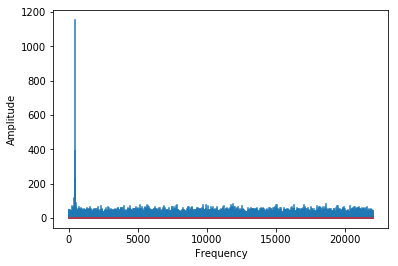

In [7]:
x = np.linspace(0, (int)(samplingRate/2), num = numSamples/2**4, endpoint=False,dtype=int32)
print(f.shape)
print(f[:(int)(numSamples/2):2**3].shape)
y = np.abs(f[:(int)(numSamples/2):2**3])
plt.stem(x,y, markerfmt=' ')
plt.ylabel('Amplitude')
plt.xlabel('Frequency')
plt.show()

Analyze the plot. The peak you will see contains the information that we want to filter. Cancel out the values with a small amplitude by setting those frequencies to zero and plot the signal again.

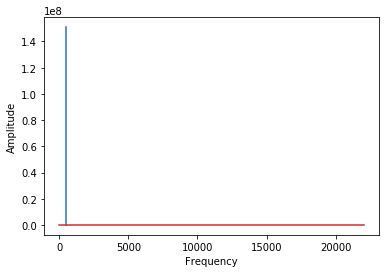

In [8]:
for i in range(0, numSamples):
    if np.abs(f[i]) < 1000.0:  # threshold determined by visual inspection of the spectrum
        f[i] = 0.0
y = np.abs(f[:(int)(numSamples/2):2**3]) / 0.5 * numSamples 

plt.stem(x,y, markerfmt=' ')
plt.ylabel('Amplitude')
plt.xlabel('Frequency')
plt.show()

Apply the inverse FFT to the edited signal, save the audio file and play the sound. It shouldn't be noisy anymore.

In [10]:
newData = np.fft.ifft(f)
scipy.io.wavfile.write('new.wav', samplingRate, np.real(newData))
audio2 = IPython.display.Audio(newData, rate=samplingRate)
audio2

C:\Users\Schirrmacher\Anaconda3\lib\site-packages\IPython\lib\display.py:123: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


## Undersampling and Oversampling

Now we want so investigate different sampling frequencies and their impact on our sampled signal.

Create an array $t$ with values from 0 to 1000.

In [11]:
samples = 1000
t = np.arange(0,samples)
time = t/samples

Create a sine signal 

$$sine = sin (2\pi \frac{2 \cdot t}{T})$$

where $T=samples$. Plot the signal. You should see a full sinus. We assume that the x-axis denotes the time in $\rm ms$ meaning that we have a $2\,\rm Hz$ sine signal. 

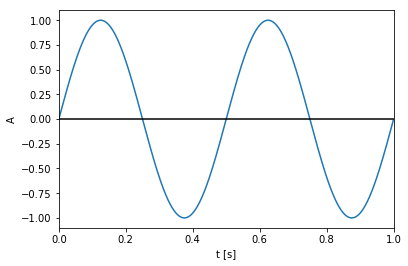

In [12]:
sine = np.sin(2*2*np.pi*t/samples)
plt.plot(time,sine)
plt.plot(zeros(len(t), int), color='#000000')
plt.xlabel('t [s]')
plt.ylabel('A')
plt.xlim([0, 1])
plt.ylim([-1.1, 1.1])
plt.show()

Now we want to sample it with different step size n (sample frequency). Therefore, we want to create two new arrays sine_sample and t_sample.

sine_sample stores every n-th value of $sine$.

t_sample stores every n-th value of $t$.

Now you can vary n to see which values would be stored.

Plot the new function and the old in one plot. Use plt.stem() to plot the sampled values.

In [13]:
n = 100
steps = int(samples/n)
t_abtast = time[::steps]
sine_abtast = sine[::steps]

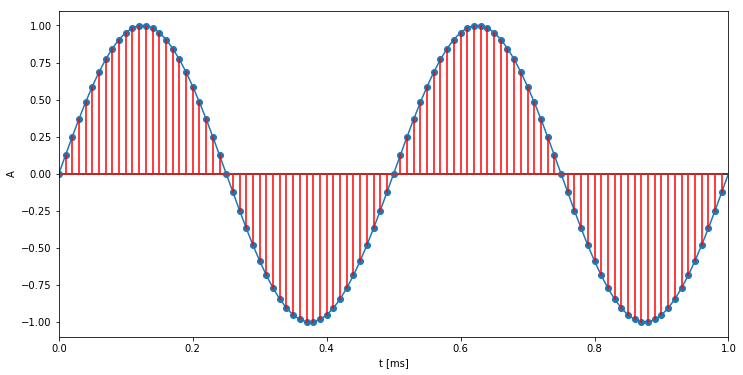

In [14]:
fig = plt.figure(figsize(12,6))
plt.plot(zeros(len(time), int), color='#000000')
plt.plot(time,sine)
plt.xlabel('t [ms]')
plt.ylabel('A')
plt.stem(t_abtast,sine_abtast,'r')
plt.xlim([0, 1])
plt.ylim([-1.1, 1.1])
plt.show()